In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from collections import defaultdict
from sklearn import preprocessing
import matplotlib
from pandas.plotting import scatter_matrix
import math
from collections import Counter

plt.rcParams['figure.figsize'] = (20,6)



In [2]:
# 7. Attribute Information:
#    1. Class: no-recurrence-events, recurrence-events
#    2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
#    3. menopause: lt40, ge40, premeno.
#    4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,
#                   45-49, 50-54, 55-59.
#    5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,
#                  27-29, 30-32, 33-35, 36-39.
#    6. node-caps: yes, no.
#    7. deg-malig: 1, 2, 3.
#    8. breast: left, right.
#    9. breast-quad: left-up, left-low, right-up,	right-low, central.
#   10. irradiat:	yes, no.

df = pd.read_csv('breast-cancer.data.txt', names=['class', 'age', 'meopause', 'tumor-size', 'inv-nodes',
                'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradidat'])

print(df.shape)

(286, 10)


# Data Visualization

[0, 1, 2, 3, 4, 5]


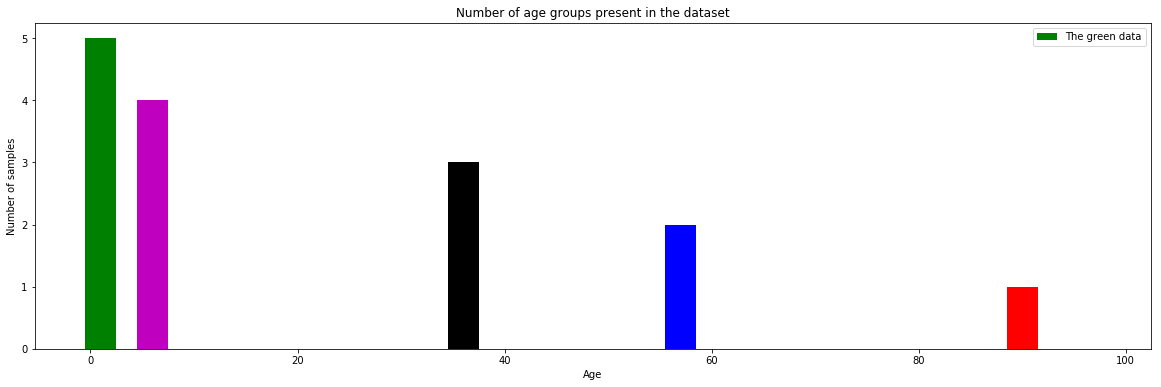

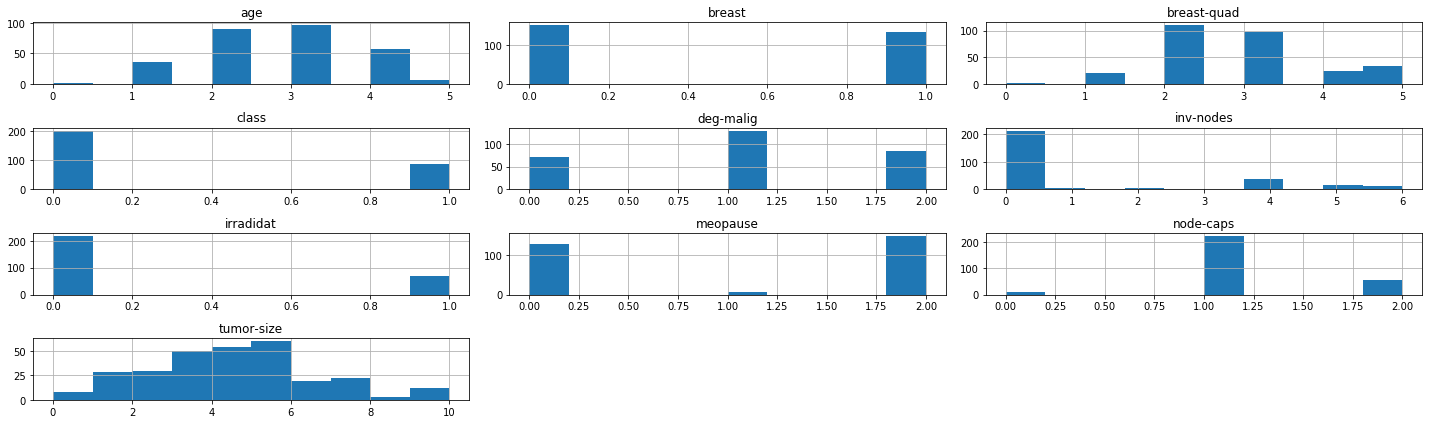

In [92]:
x = []
y = []
colors = ['g', 'r', 'b', 'k', 'm']
for i in df['age'].value_counts():
    x.append(i)
     
for j in df['age']:
    y.append(j)
y = sorted(list(set(y)))
print(y)


features_means = ['age', 'meopause', 'tumor-size', 'inv-nodes',
                'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradidat']

fig, ax = plt.subplots()
ax.bar(x, height=y, width=3, align='center', color=colors, 
       label='The green data')
ax.set_ylabel('Number of samples')
ax.set_xlabel('Age')
ax.legend()
ax.set_title('Number of age groups present in the dataset')

df.hist()
plt.tight_layout()
plt.show()





In [93]:
data_dummies = pd.get_dummies(df)
print(data_dummies.shape)
# data_dummies.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
# plt.show()


(286, 10)


# Multivariate Plots

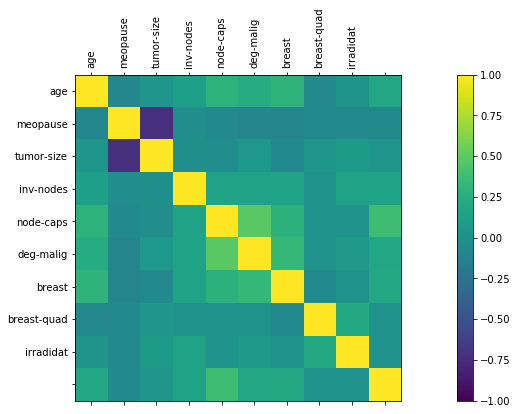

In [97]:


correlations = data_dummies.corr()

fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(111)


cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features_means, rotation=90)
ax.set_yticklabels(features_means, rotation=0)
plt.show()

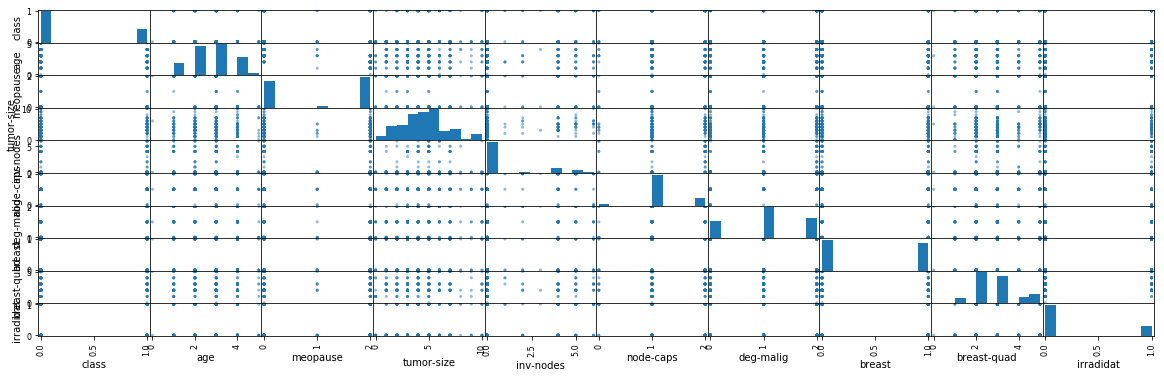

In [95]:
# le = preprocessing.LabelEncoder()
# df = le.fit_transform(df)
# print(df)

df = pd.DataFrame({col: df[col].astype('category').cat.codes for col in df}, index=df.index)
scatter_matrix(df)
plt.show()





In [9]:
def read_file(fin):
    labeled_data = []
    with open(fin, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if '?' in row:
                continue
            if row[0] == 'no-recurrence-events':
                labeled_data.append(row[1:] + [False])
            else:
                labeled_data.append(row[1:] + [True])
    return labeled_data
                
            
data = read_file('breast-cancer.data.txt')
print(data)


[['30-39', 'premeno', '30-34', '0-2', 'no', '3', 'left', 'left_low', 'no', False], ['40-49', 'premeno', '20-24', '0-2', 'no', '2', 'right', 'right_up', 'no', False], ['40-49', 'premeno', '20-24', '0-2', 'no', '2', 'left', 'left_low', 'no', False], ['60-69', 'ge40', '15-19', '0-2', 'no', '2', 'right', 'left_up', 'no', False], ['40-49', 'premeno', '0-4', '0-2', 'no', '2', 'right', 'right_low', 'no', False], ['60-69', 'ge40', '15-19', '0-2', 'no', '2', 'left', 'left_low', 'no', False], ['50-59', 'premeno', '25-29', '0-2', 'no', '2', 'left', 'left_low', 'no', False], ['60-69', 'ge40', '20-24', '0-2', 'no', '1', 'left', 'left_low', 'no', False], ['40-49', 'premeno', '50-54', '0-2', 'no', '2', 'left', 'left_low', 'no', False], ['40-49', 'premeno', '20-24', '0-2', 'no', '2', 'right', 'left_up', 'no', False], ['40-49', 'premeno', '0-4', '0-2', 'no', '3', 'left', 'central', 'no', False], ['50-59', 'ge40', '25-29', '0-2', 'no', '2', 'left', 'left_low', 'no', False], ['60-69', 'lt40', '10-14', '0

In [66]:
def tran_form_dict(labeled_data):
    """Change the features of each instance into numbers and then place each instance into a dictionary with their
    key being their label """
    feat_into_dict = {}
    for feature_num in range(len(labeled_data[0])):
        feature_values = [instance[feature_num] for instance in labeled_data]
        x = 0
        for i, item in enumerate(feature_values):
            if item in feat_into_dict:
                feature_values[i] = feat_into_dict[item]
            else:
                feat_into_dict[item] = x
                feature_values[i] = feat_into_dict[item]
                x += 1
      
    for instance in labeled_data:
        for i, attribute in enumerate(instance):
             instance[i] = feat_into_dict[attribute]
                
    #place each instance into dictionary
    input_dict = defaultdict(list)
    for instance in labeled_data:
        if instance[-1] == 0:
            input_dict[False].append(instance)
        else:
            input_dict[True].append(instance)
    
    
    return input_dict
                


new_data = tran_form_dict(data)
print(new_data)
    
    


defaultdict(<class 'list'>, {False: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 1, 0, 0, 0, 0], [2, 1, 2, 0, 0, 1, 1, 2, 0, 0], [1, 0, 3, 0, 0, 1, 1, 3, 0, 0], [2, 1, 2, 0, 0, 1, 0, 0, 0, 0], [3, 0, 4, 0, 0, 1, 0, 0, 0, 0], [2, 1, 1, 0, 0, 2, 0, 0, 0, 0], [1, 0, 5, 0, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 1, 2, 0, 0], [1, 0, 3, 0, 0, 0, 0, 4, 0, 0], [3, 1, 4, 0, 0, 1, 0, 0, 0, 0], [2, 2, 0, 0, 0, 2, 0, 1, 0, 0], [3, 1, 4, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 2, 0, 0], [2, 2, 0, 0, 0, 2, 0, 0, 0, 0], [1, 0, 2, 0, 0, 1, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 1, 0, 0, 0, 0, 0, 0, 0, 0], [3, 1, 0, 0, 0, 2, 1, 1, 0, 0], [3, 1, 1, 0, 0, 1, 0, 0, 0, 0], [2, 1, 2, 0, 0, 1, 0, 0, 0, 0], [0, 0, 4, 0, 0, 1, 1, 0, 0, 0], [3, 0, 1, 0, 0, 1, 0, 2, 0, 0], [3, 0, 2, 0, 0, 1, 1, 2, 0, 0], [1, 0, 4, 0, 0, 1, 0, 2, 0, 0], [3, 0, 1, 0, 0, 2, 0, 0, 0, 0], [2, 1, 4, 0, 0, 0, 1, 2, 0, 0], [1, 0, 1, 0, 0, 1, 1, 0, 0, 0], [2, 1, 0, 0, 0, 1, 0, 0, 0, 0], [3,

In [83]:
def euclidean_distance(p1, q1):
    return np.sqrt(np.sum((np.array(p1) - np.array(q1))**2))

def k_nearest_neighbors(data, predict, k=3):
    
    if len(data[0]) <= k:
        print('Error: the k value is too big!')
    distances = []
    for group in data:
        for instance in data[group]:
            distance = euclidean_distance(instance, predict)
            print(distance)
            distances.append([distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    print(votes)
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result
            
result = k_nearest_neighbors(new_data, [2, 1, 1, 0, 0, 0, 1, 0, 0, 1])
if result:
    print('You have breast cancer')
else:
    print("Don't worry...you don't have breast cancer")
    
    
    
    

2.8284271247461903
2.23606797749979
2.23606797749979
2.6457513110645907
4.123105625617661
2.0
3.7416573867739413
2.449489742783178
4.58257569495584
2.8284271247461903
4.898979485566356
3.605551275463989
3.0
3.605551275463989
3.0
2.8284271247461903
2.449489742783178
2.23606797749979
1.7320508075688772
2.8284271247461903
2.0
2.0
4.0
3.0
3.0
4.242640687119285
2.8284271247461903
3.7416573867739413
2.0
2.0
2.449489742783178
2.23606797749979
2.23606797749979
3.3166247903554
3.4641016151377544
3.605551275463989
4.898979485566356
4.795831523312719
2.449489742783178
3.0
2.449489742783178
3.4641016151377544
5.0990195135927845
3.1622776601683795
4.795831523312719
3.4641016151377544
3.605551275463989
4.47213595499958
2.8284271247461903
2.6457513110645907
2.449489742783178
4.123105625617661
3.0
3.1622776601683795
3.605551275463989
3.1622776601683795
5.0990195135927845
2.8284271247461903
3.3166247903554
3.1622776601683795
4.58257569495584
4.123105625617661
3.3166247903554
3.7416573867739413
5.099019